Пусть у нас есть данные о людях из вк - количество их друзей и год рождения. Хотим проверить, как год рождения влияет на число друзей.

In [1]:
import pymongo


In [2]:
from pymongo import MongoClient

In [3]:
client = MongoClient()

In [4]:
db = client.test_database

In [5]:
friend_col = db.friends

In [6]:
import random

In [7]:
to_ins = []
for k in range(1000):
    cur = {
        "birth_year" : random.randint(1980, 2010),
        "number_of_friends" : random.randint(1, 500)
    }
    to_ins.append(cur)

In [8]:
len(to_ins)

1000

In [9]:
friend_col.insert_many(to_ins)

In [10]:
friend_col.find({"birth_year":1999}).skip(2)[0]

{'_id': ObjectId('5fff2057f4a07d6263ae1c55'),
 'birth_year': 1999,
 'number_of_friends': 10}

In [11]:
from bson.code import Code


In [12]:
map = Code("function () {"
            "    emit(this.birth_year, this.number_of_friends);"
            "  }"
            )

In [13]:
reduce = Code("function (key, values) {"
              "  var total = 0;"
               "  for (var i = 0; i < values.length; i++) {"
               "    total += values[i];"
               "  }"
               "  return total / values.length;"
              "}")

In [14]:
res = friend_col.map_reduce(map, reduce, "result")
bir_year = []
av_fr = []
for doc in res.find().sort('value',pymongo.DESCENDING):
    print("Birth year: ", int(doc['_id']))
    print("Average umber of friends ", int(doc['value']))
    bir_year.append(int(doc['_id']))
    av_fr.append(int(doc['value']))

Birth year:  2006
Average umber of friends  303
Birth year:  1998
Average umber of friends  296
Birth year:  2000
Average umber of friends  286
Birth year:  1990
Average umber of friends  279
Birth year:  1985
Average umber of friends  278
Birth year:  1995
Average umber of friends  276
Birth year:  1997
Average umber of friends  276
Birth year:  2009
Average umber of friends  274
Birth year:  1986
Average umber of friends  273
Birth year:  1984
Average umber of friends  273
Birth year:  1980
Average umber of friends  268
Birth year:  2005
Average umber of friends  266
Birth year:  1981
Average umber of friends  265
Birth year:  1989
Average umber of friends  263
Birth year:  1991
Average umber of friends  261
Birth year:  1982
Average umber of friends  259
Birth year:  1983
Average umber of friends  258
Birth year:  2008
Average umber of friends  257
Birth year:  1988
Average umber of friends  254
Birth year:  1993
Average umber of friends  252
Birth year:  1999
Average umber of frien

In [15]:
import matplotlib.pyplot as plt


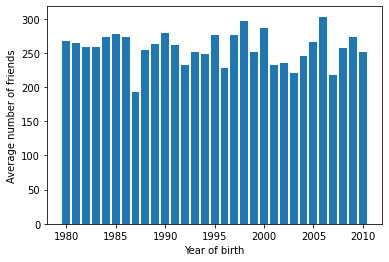

In [16]:
plt.bar(bir_year, av_fr)
plt.xlabel('Year of birth')
plt.ylabel('Average number of friends')
plt.show()